### Введение

Эта работа представляет собой исследование набора данных имитирующее крупномасштабное исследование 100 000 студентов университета, уделяя особое внимание их образу жизни, успеваемости и психическому благополучию, создание классической модели классификации и нейронной сети, с последующим анализом результатов обучения. На выходе должная получится модель, которая определяет ментальное состояние студента по определенным данным.

### Подключение модулей

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf
from tensorflow import keras

### Загрузка данных

In [6]:
df = pd.read_csv("..\Yupiter`sData\student_lifestyle_100k.csv")
df.head()

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Student_ID          100000 non-null  int64  
 1   Age                 100000 non-null  int64  
 2   Gender              100000 non-null  object 
 3   Department          100000 non-null  object 
 4   CGPA                100000 non-null  float64
 5   Sleep_Duration      100000 non-null  float64
 6   Study_Hours         100000 non-null  float64
 7   Social_Media_Hours  100000 non-null  float64
 8   Physical_Activity   100000 non-null  int64  
 9   Stress_Level        100000 non-null  int64  
 10  Depression          100000 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(2)
memory usage: 7.7+ MB


In [8]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [14]:
df.describe(include='all')

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
count,100000.0000,100000.0000,100000,100000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000
unique,NaN,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Male,Science,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,50120,20071,NaN,NaN,NaN,NaN,NaN,NaN,89938
mean,51000.5000,21.0090,NaN,NaN,2.8983,6.9964,4.5095,3.5033,74.3532,4.1317,NaN
std,28867.6578,2.0004,NaN,NaN,0.5322,1.4987,1.9761,1.4869,43.3670,1.4242,NaN
min,1001.0000,18.0000,NaN,NaN,1.5600,3.0000,0.0000,0.0000,0.0000,2.0000,NaN
25%,26000.7500,19.0000,NaN,NaN,2.4500,6.0000,3.2000,2.5000,37.0000,3.0000,NaN
50%,51000.5000,21.0000,NaN,NaN,2.9000,7.0000,4.5000,3.5000,74.0000,4.0000,NaN
75%,76000.2500,23.0000,NaN,NaN,3.3500,8.0000,5.8000,4.5000,112.0000,5.0000,NaN


Набор данных содержит 100 000 строк и 11 столбцов без пропущенных значений.

* Student_ID	Уникальный идентификатор для каждого студента
* Age  Возраст студента (18-24)
* Gender	Пол учащегося (мужской/женский)
* Department	Область обучения (Инжиниринг, Бизнес, Искусство и др.)
* CGPA	Совокупный средний балл (1,56-4,0)
* Sleep_Duration	Среднее количество часов сна за ночь
* Study_Hours	Среднее количество часов, затраченных на обучение в день
* Social_Media_Hours	Среднее количество часов, проведенных в социальных сетях в день
* Physical_Activity	Средние минуты физической активности в неделю
* Stress_Level	Уровень стресса по самооценке (2-10)
* Depression	Состояние психического здоровья (истина = вероятная депрессия, ложь = здоровый)


В среднем в датасете встречаются студенты в возрасте 21 год, со средним балом 2,9 спящие за ночь 7 часов, обучающиеся за день 4,5 часа, проводящие в социальных сетях 3,5 часа, занимающиеся физ. активностью 75 часов в неделю и с уровнем стресса, по их мнению, 4 балла

### Визуальная статистика

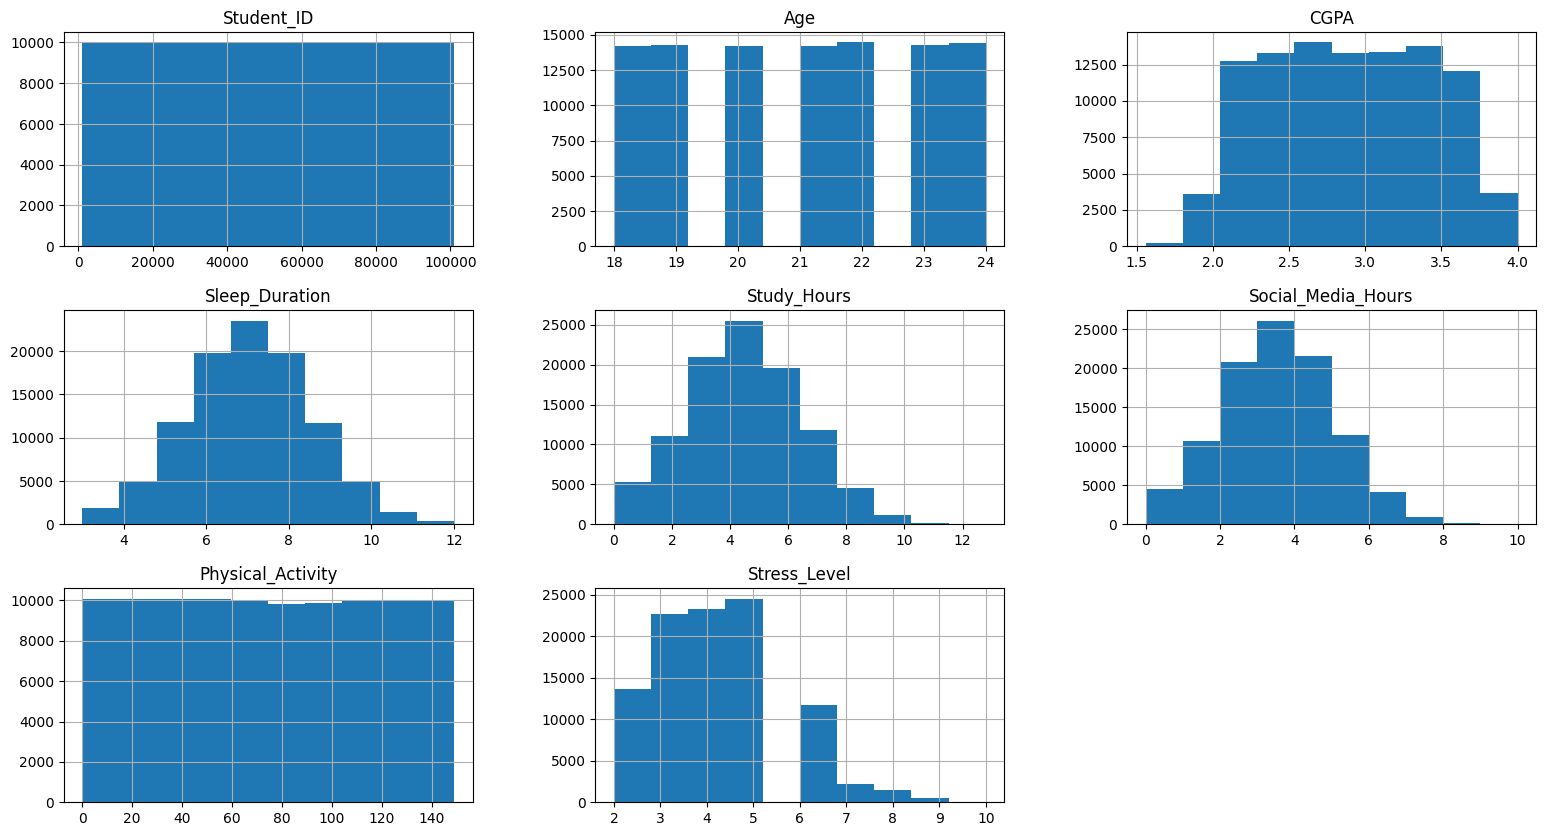

In [21]:
df.hist(figsize=(19,10));

<Axes: xlabel='Depression', ylabel='count'>

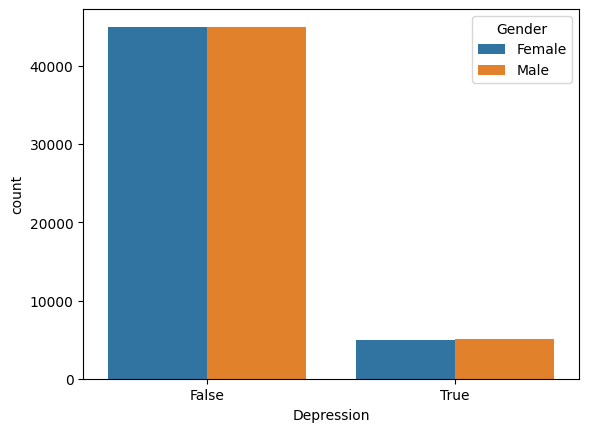

In [29]:
sns.countplot(data = df, x ="Depression", hue = "Gender")

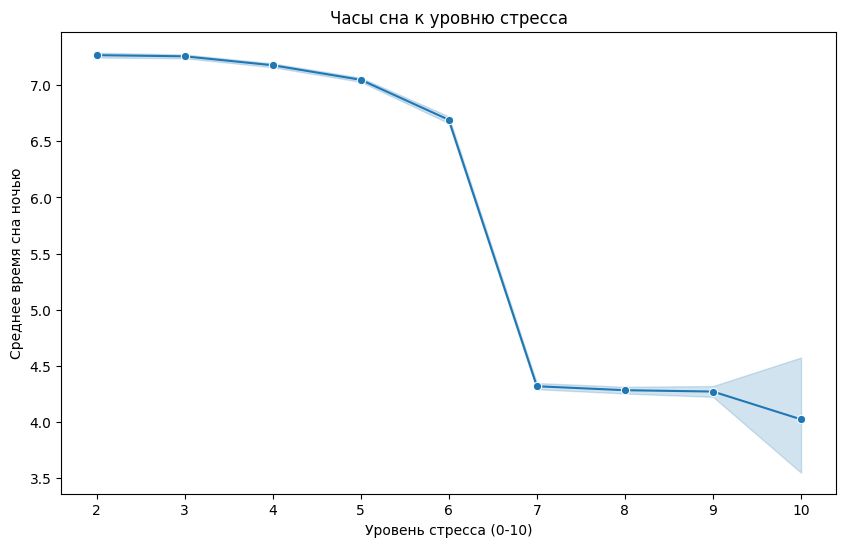

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Stress_Level', y='Sleep_Duration', data=df, marker='o')
plt.title('Часы сна к уровню стресса')
plt.xlabel('Уровень стресса (0-10)')
plt.ylabel('Среднее время сна ночью')
plt.show()

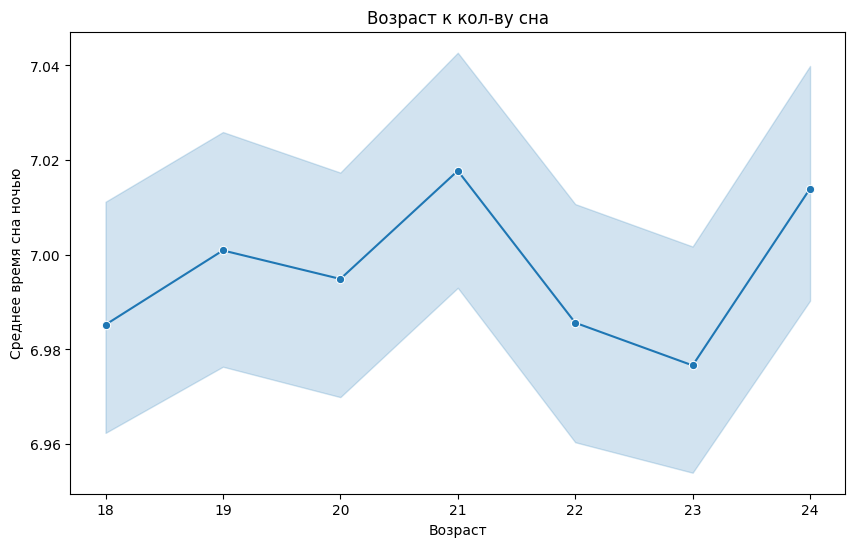

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Sleep_Duration', data=df, marker='o')
plt.title('Возраст к кол-ву сна')
plt.xlabel('Возраст')
plt.ylabel('Среднее время сна ночью')
plt.show()

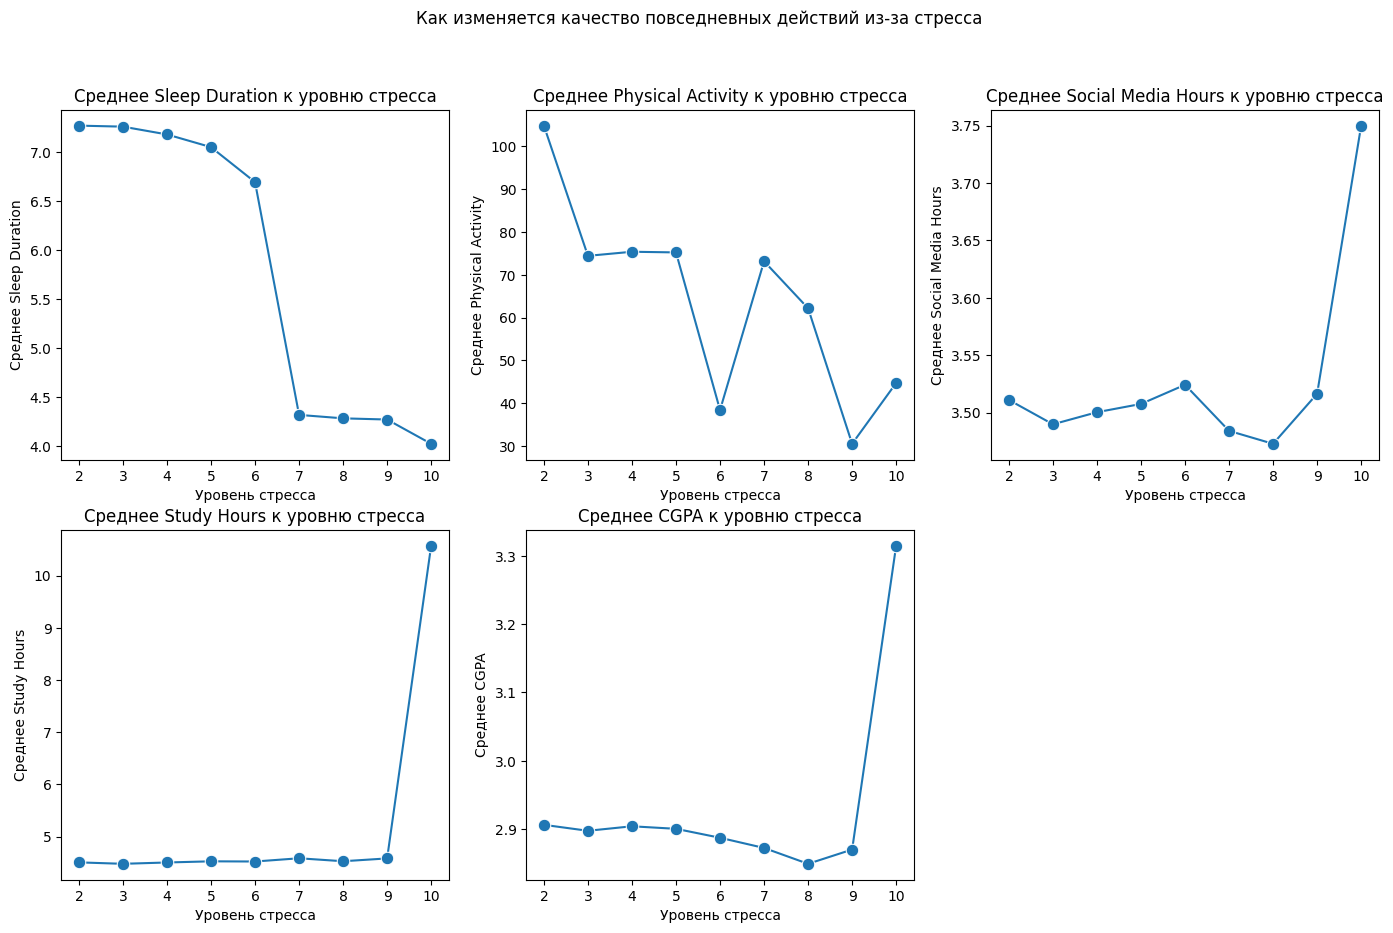

In [85]:
stress_vars = ['Sleep_Duration', 'Physical_Activity', 'Social_Media_Hours',
               'Study_Hours', 'CGPA']

fig, axes = plt.subplots(2, 3, figsize=(17, 10))
axes = axes.flatten()

for i, var in enumerate(stress_vars):
    grouped = df.groupby('Stress_Level')[var].mean().reset_index()
    
    sns.lineplot(
        data=grouped,
        x='Stress_Level',
        y=var,
        marker='o',
        markersize=9,
        ax=axes[i]
    )
    
    axes[i].set_title(f"Среднее {var.replace('_',' ')} к уровню стресса")
    axes[i].set_xlabel("Уровень стресса")
    axes[i].set_ylabel(f"Среднее {var.replace('_',' ')}")

if len(stress_vars) < 6:
    axes.flatten()[len(stress_vars)].set_visible(False)

plt.suptitle("Как изменяется качество повседневных действий из-за стресса")
plt.show()

#### Обработка признаков для корреляционной таблицы

In [30]:
df['Gender_numeric'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [31]:
df['Department'].value_counts()

Department
Science        20071
Engineering    20057
Arts           19998
Medical        19964
Business       19910
Name: count, dtype: int64

In [32]:
df['Department_numeric'] = df['Department'].map({'Science': 0, 'Engineering': 1, 'Medical': 2, 'Arts': 3, 'Business': 4})

In [33]:
df

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression,Gender_numeric,Department_numeric
0,1001,22,Female,Science,3.5000,7.3000,3.3000,3.4000,114,5,False,0,0
1,1002,20,Male,Engineering,2.7200,5.5000,7.2000,6.0000,142,2,False,1,1
2,1003,20,Male,Medical,3.0100,5.4000,2.3000,1.8000,137,3,False,1,2
3,1004,21,Male,Engineering,3.6300,8.1000,2.0000,4.6000,130,3,False,1,1
4,1005,19,Male,Arts,3.1400,6.8000,2.6000,4.3000,4,6,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,100996,24,Female,Medical,2.0200,7.0000,0.6000,1.4000,66,4,False,0,2
99996,100997,24,Male,Arts,2.3300,5.0000,3.6000,5.2000,103,3,False,1,3
99997,100998,24,Female,Engineering,2.2300,6.5000,5.8000,4.1000,61,5,False,0,1
99998,100999,19,Male,Engineering,3.6100,6.1000,4.8000,4.9000,116,4,False,1,1


In [34]:
corr_table = df[['Age', 'Gender_numeric', 'Department_numeric', 'CGPA', 'Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 	'Stress_Level', 'Depression']].corr()

<Axes: >

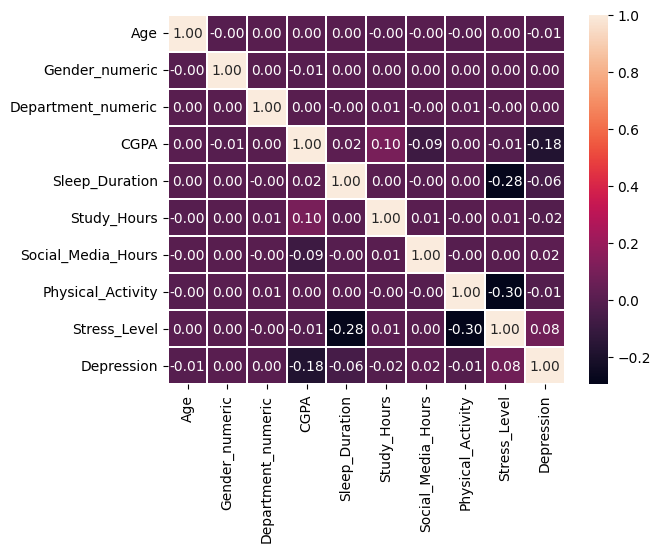

In [35]:
sns.heatmap(corr_table, annot=True, linewidths=0.2, fmt = '.2f')

### Обучение модели классификации

In [50]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Age', 'Gender_numeric', 'Department_numeric', 'Study_Hours', 'Social_Media_Hours', 'Physical_Activity','Student_ID', 'Gender', 'Department', 'Depression'], axis=1)
y = df['Depression'].astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
# Т.к. целевая переменная несбалансирована, нужно использовать балансировку для модели
model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=9, # Ключевой параметр для баланса 90/10
    use_label_encoder=False,
    eval_metric='logloss'
)

In [39]:
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [40]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     17988
           1       0.21      0.61      0.32      2012

    accuracy                           0.73     20000
   macro avg       0.58      0.68      0.58     20000
weighted avg       0.87      0.73      0.78     20000



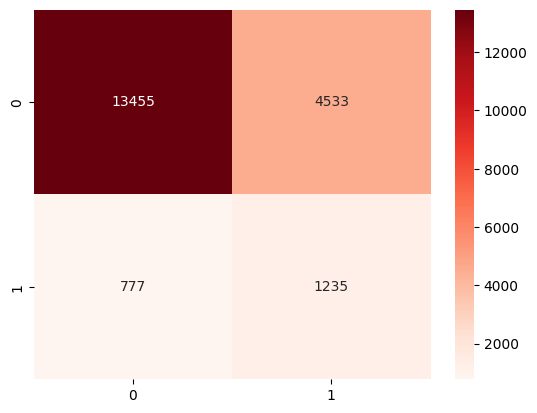

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

### Обучение нейронной модели

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

class_weight = {0: 1.0, 1: 9.0}

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['AUC', tf.keras.metrics.Recall()])

history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_split=0.1,
                    class_weight=class_weight,
                    verbose=1)

Epoch 1/50
1125/1125 [==============================] - 2s 1ms/step - loss: 1.1502 - auc: 0.6899 - recall_1: 0.6679 - val_loss: 0.6655 - val_auc: 0.6819 - val_recall_1: 0.6486
Epoch 2/50
1125/1125 [==============================] - 1s 928us/step - loss: 1.1318 - auc: 0.7007 - recall_1: 0.6584 - val_loss: 0.6400 - val_auc: 0.6839 - val_recall_1: 0.6297
Epoch 3/50
1125/1125 [==============================] - 1s 927us/step - loss: 1.1269 - auc: 0.7040 - recall_1: 0.6553 - val_loss: 0.6597 - val_auc: 0.6830 - val_recall_1: 0.6398
Epoch 4/50
1125/1125 [==============================] - 1s 927us/step - loss: 1.1242 - auc: 0.7052 - recall_1: 0.6567 - val_loss: 0.6195 - val_auc: 0.6846 - val_recall_1: 0.6196
Epoch 5/50
1125/1125 [==============================] - 1s 928us/step - loss: 1.1215 - auc: 0.7065 - recall_1: 0.6553 - val_loss: 0.5815 - val_auc: 0.6835 - val_recall_1: 0.5995
Epoch 6/50
1125/1125 [==============================] - 1s 927us/step - loss: 1.1190 - auc: 0.7092 - recall_1: 0

In [43]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [44]:
predictions = model.predict(X_test_scaled)

625/625 [==============================] - 0s 641us/step


In [45]:
y_pred_proba = predictions.flatten()

In [46]:
y_pred_proba

array([0.48670337, 0.5675526 , 0.5654181 , ..., 0.28366458, 0.46154654,
       0.51340765], dtype=float32)

In [47]:
y_pred = (y_pred_proba >= 0.5).astype(int)

In [48]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                           target_names=['No Depression', 'Depression']))

               precision    recall  f1-score   support

No Depression       0.94      0.69      0.79     17988
   Depression       0.19      0.64      0.29      2012

     accuracy                           0.68     20000
    macro avg       0.56      0.66      0.54     20000
 weighted avg       0.87      0.68      0.74     20000



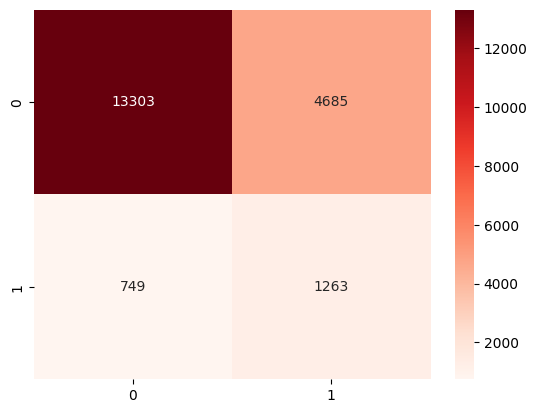

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

### Вывод

Как видно на оценках обоих моделей - они не сильно розняться по результатам определения депрессии: 
* precision: 0.21(0.21 у XGB)
* recall: 0.63(0.61 у XGB)
* f1-score: 0.32

Это может означать, то что проблема в наборе данных. На модели сильно влияет несбалансированность классов. Как таковая балансировка мало чем помогает. По корреляционной матрице, можно наблюдать только очень слабую связь оценок к депрессии. Можно попытаться оставить только этот признак и обучить нейронную модель заново.

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

class_weight = {0: 1.0, 1: 9.0}

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['AUC', tf.keras.metrics.Recall()])

history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_split=0.1,
                    class_weight=class_weight,
                    verbose=1)

Epoch 1/50
1125/1125 [==============================] - 2s 1ms/step - loss: 1.1487 - auc: 0.6910 - recall_2: 0.6677 - val_loss: 0.6276 - val_auc: 0.6861 - val_recall_2: 0.6297
Epoch 2/50
1125/1125 [==============================] - 1s 1ms/step - loss: 1.1327 - auc: 0.7003 - recall_2: 0.6581 - val_loss: 0.6271 - val_auc: 0.6847 - val_recall_2: 0.6209
Epoch 3/50
1125/1125 [==============================] - 1s 1ms/step - loss: 1.1278 - auc: 0.7031 - recall_2: 0.6577 - val_loss: 0.6185 - val_auc: 0.6812 - val_recall_2: 0.6033
Epoch 4/50
1125/1125 [==============================] - 1s 956us/step - loss: 1.1246 - auc: 0.7053 - recall_2: 0.6575 - val_loss: 0.6121 - val_auc: 0.6828 - val_recall_2: 0.5995
Epoch 5/50
1125/1125 [==============================] - 1s 949us/step - loss: 1.1221 - auc: 0.7075 - recall_2: 0.6561 - val_loss: 0.6379 - val_auc: 0.6860 - val_recall_2: 0.6348
Epoch 6/50
1125/1125 [==============================] - 1s 962us/step - loss: 1.1200 - auc: 0.7095 - recall_2: 0.653

In [53]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [54]:
predictions = model.predict(X_test_scaled)

625/625 [==============================] - 0s 590us/step


In [55]:
y_pred_proba = predictions.flatten()

In [56]:
y_pred = (y_pred_proba >= 0.5).astype(int)

In [57]:
print(classification_report(y_test, y_pred,
                           target_names=['No Depression', 'Depression']))

               precision    recall  f1-score   support

No Depression       0.94      0.74      0.83     17988
   Depression       0.20      0.61      0.31      2012

     accuracy                           0.72     20000
    macro avg       0.57      0.67      0.57     20000
 weighted avg       0.87      0.72      0.77     20000



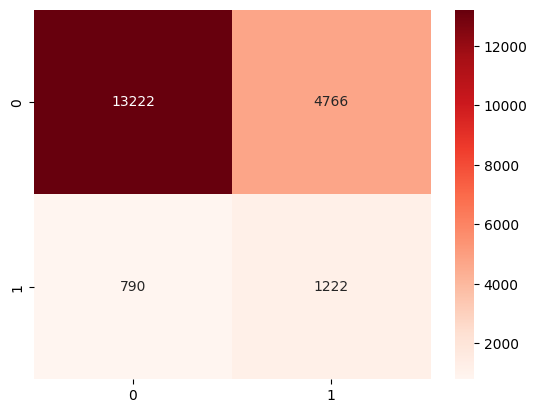

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

Результат, к сожалению, остался на том же уровне, даже чуть, хуже чем было.

Вобще, нейронная модель сильна тем, что она может распознать паттерны или скрытые зависимости в датасете, что сильно помогает в обучении и тем самым улучшая её эффективность. В этом датасете, нейронная модель найти таких паттернов не смогла.